Loading files...
Successfully loaded: merged_data70s (1).csv
Successfully loaded: merged_data80s.csv
Successfully loaded: merged_data90s.csv
Successfully loaded: merged_data00s (1).csv
Successfully loaded: merged_data10s.csv
Successfully loaded: merged_data20s (1).csv
Successfully loaded: merged_data (1).csv

Top 5 Historic Tennis Nations identified: ['USA', 'ESP', 'FRA', 'AUS', 'GER']

Success! Chart saved as 'top_5_nations_trend.png'
Data saved as 'top_5_nations_evolution.csv'


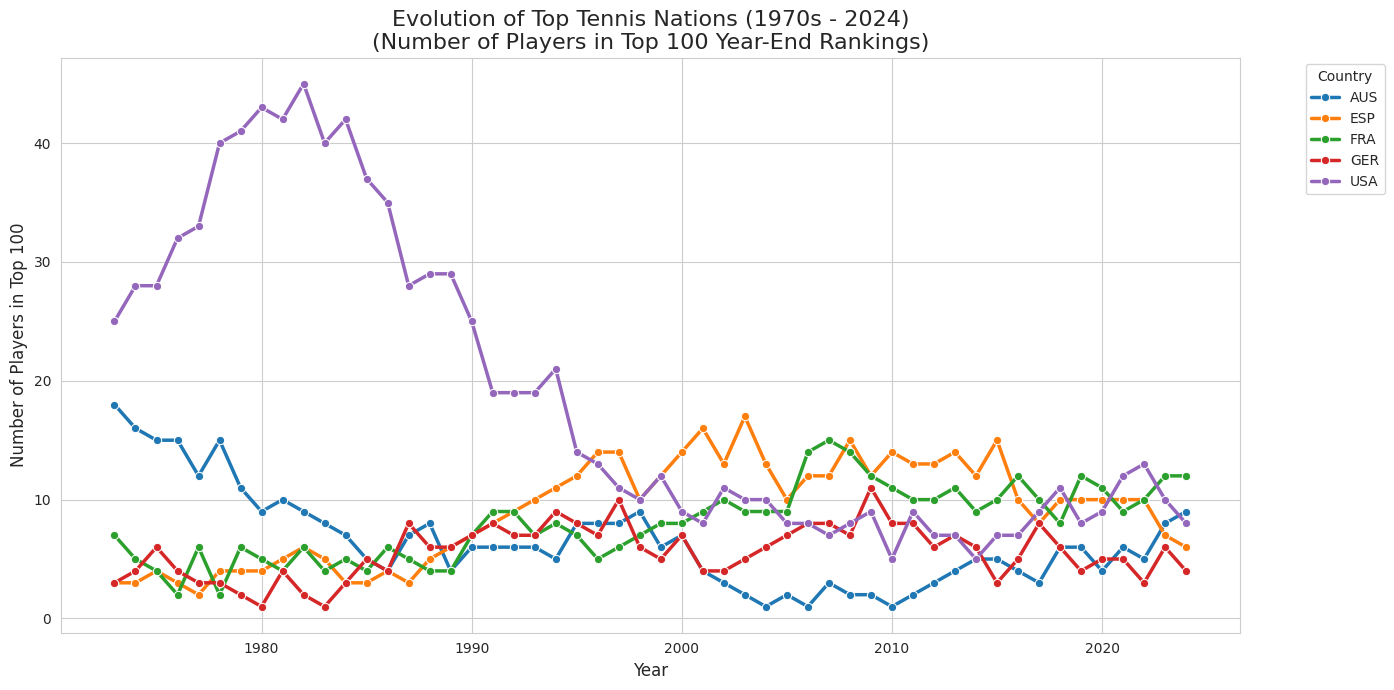

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Setup File List
# These are the filenames based on your upload.
# If you rename them, update this list accordingly.
files = [
    'merged_data70s (1).csv',
    'merged_data80s.csv',
    'merged_data90s.csv',
    'merged_data00s (1).csv',
    'merged_data10s.csv',
    'merged_data20s (1).csv',
    'merged_data (1).csv' # This contains 2024 data
]

# 2. Load and Concatenate Data
df_list = []
print("Loading files...")
for f in files:
    try:
        # We only need specific columns for this analysis
        temp_df = pd.read_csv(f, usecols=['ranking_date', 'rank', 'ioc'])
        df_list.append(temp_df)
        print(f"Successfully loaded: {f}")
    except Exception as e:
        print(f"Error loading {f}: {e}")

# Combine all dataframes into one
full_df = pd.concat(df_list, ignore_index=True)

# 3. Data Cleaning & Processing
# Convert ranking_date string (YYYYMMDD) to datetime objects
full_df['ranking_date'] = pd.to_datetime(full_df['ranking_date'], format='%Y%m%d', errors='coerce')

# Remove rows with missing dates
full_df = full_df.dropna(subset=['ranking_date'])

# Extract the Year
full_df['year'] = full_df['ranking_date'].dt.year

# Filter for only Top 100 Players
top_100_df = full_df[full_df['rank'] <= 100].copy()

# 4. Strategy: Use Year-End Rankings
# We want one data point per year (usually the last ranking date of that year)
max_dates = top_100_df.groupby('year')['ranking_date'].max().reset_index()

# Merge to keep only the rows corresponding to those year-end dates
year_end_rankings = pd.merge(top_100_df, max_dates, on=['year', 'ranking_date'])

# 5. Count Players per Country per Year
country_yearly_counts = year_end_rankings.groupby(['year', 'ioc']).size().reset_index(name='player_count')

# 6. Identify the Top 5 Historic Nations
# We sum up the total player-years for each country to find the historically dominant ones
total_counts = country_yearly_counts.groupby('ioc')['player_count'].sum().sort_values(ascending=False)
top_5_countries = total_counts.head(5).index.tolist()

print(f"\nTop 5 Historic Tennis Nations identified: {top_5_countries}")

# Filter the dataset to include only these 5 countries
plot_data = country_yearly_counts[country_yearly_counts['ioc'].isin(top_5_countries)]

# 7. Plotting
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid") # Sets a clean background grid

# Create the line plot
sns.lineplot(
    data=plot_data,
    x='year',
    y='player_count',
    hue='ioc',
    linewidth=2.5,
    marker='o',
    palette='tab10' # Vibrant color palette
)

# Customizing the chart
plt.title('Evolution of Top Tennis Nations (1970s - 2024)\n(Number of Players in Top 100 Year-End Rankings)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Players in Top 100', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot and the processed data
plt.savefig('top_5_nations_trend.png', dpi=300)
plot_data.to_csv('top_5_nations_evolution.csv', index=False)

print("\nSuccess! Chart saved as 'top_5_nations_trend.png'")
print("Data saved as 'top_5_nations_evolution.csv'")

plt.show()